# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

1. Ubicacion:
    - Cercania a:
        . Hospitales
        . Escuelas
        . Centros Comerciales
    - Zona:
        . Centro
        . Periferia
        . Country
        . Barrio Cerrado
        . "Calidad de vida" del barrio
2. Tipo de propiedad:
    - Departamento
    - Casa
    - PH
3. Ambientes
4. Superficie
    - Total
    - Cubierta
5. Amenities:
    - Cochera
    - Balcon
    - Patio Trasero y Delantero
    - Posibilidad de tener animales.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Cargamos el dataset de Properati
properti = pd.read_csv("../DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# Conocemos la "forma" del dataset en filas y columnas
properti.shape

(146660, 19)

In [4]:
# Imprimimos las 5 primeras filas
properti.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Determinamos los nombres de las columnas y la cantidad de valores faltontes para cada una
print(properti.isna().sum()) 

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
# Creamos una variable que guarde la cantidad de observaciones por tipo de propiedad e imprimimos los tipos de propiedad y cuantos registros posee cada uno
cantidad_tipo = properti['property_type'].value_counts()
print(cantidad_tipo)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='property_type'>

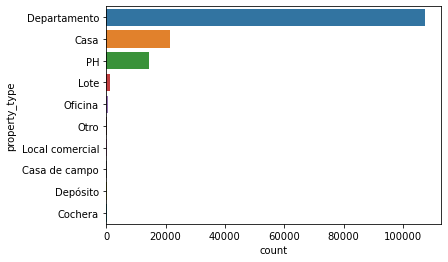

In [7]:
#Realizamos un grafico de barras para determinar de manera visible la distribucion de las observaciones segun tipo de propiedad, donde se evidencia una fuerte presencia de los tipos "Departamento, Casa y PH"
sns.countplot(data = properti, y = 'property_type', order=properti['property_type'].value_counts().index)

In [8]:
#Variable que guarda de manera clara los tipos de propiedad presentes en la base
tipo_propiedad = properti['property_type'].unique()
print(tipo_propiedad)

['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [9]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Cantidad de observaciones de acuerdo al valor de la columna 'l2', zona
region_l2 = properti['l2'].value_counts()
print(region_l2)

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [10]:
#Cantidad de observaciones de acuerdo al valor de la columna 'l3', barrio
region_l3 = properti['l3'].value_counts()
print(region_l3)

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


<AxesSubplot:xlabel='count', ylabel='l2'>

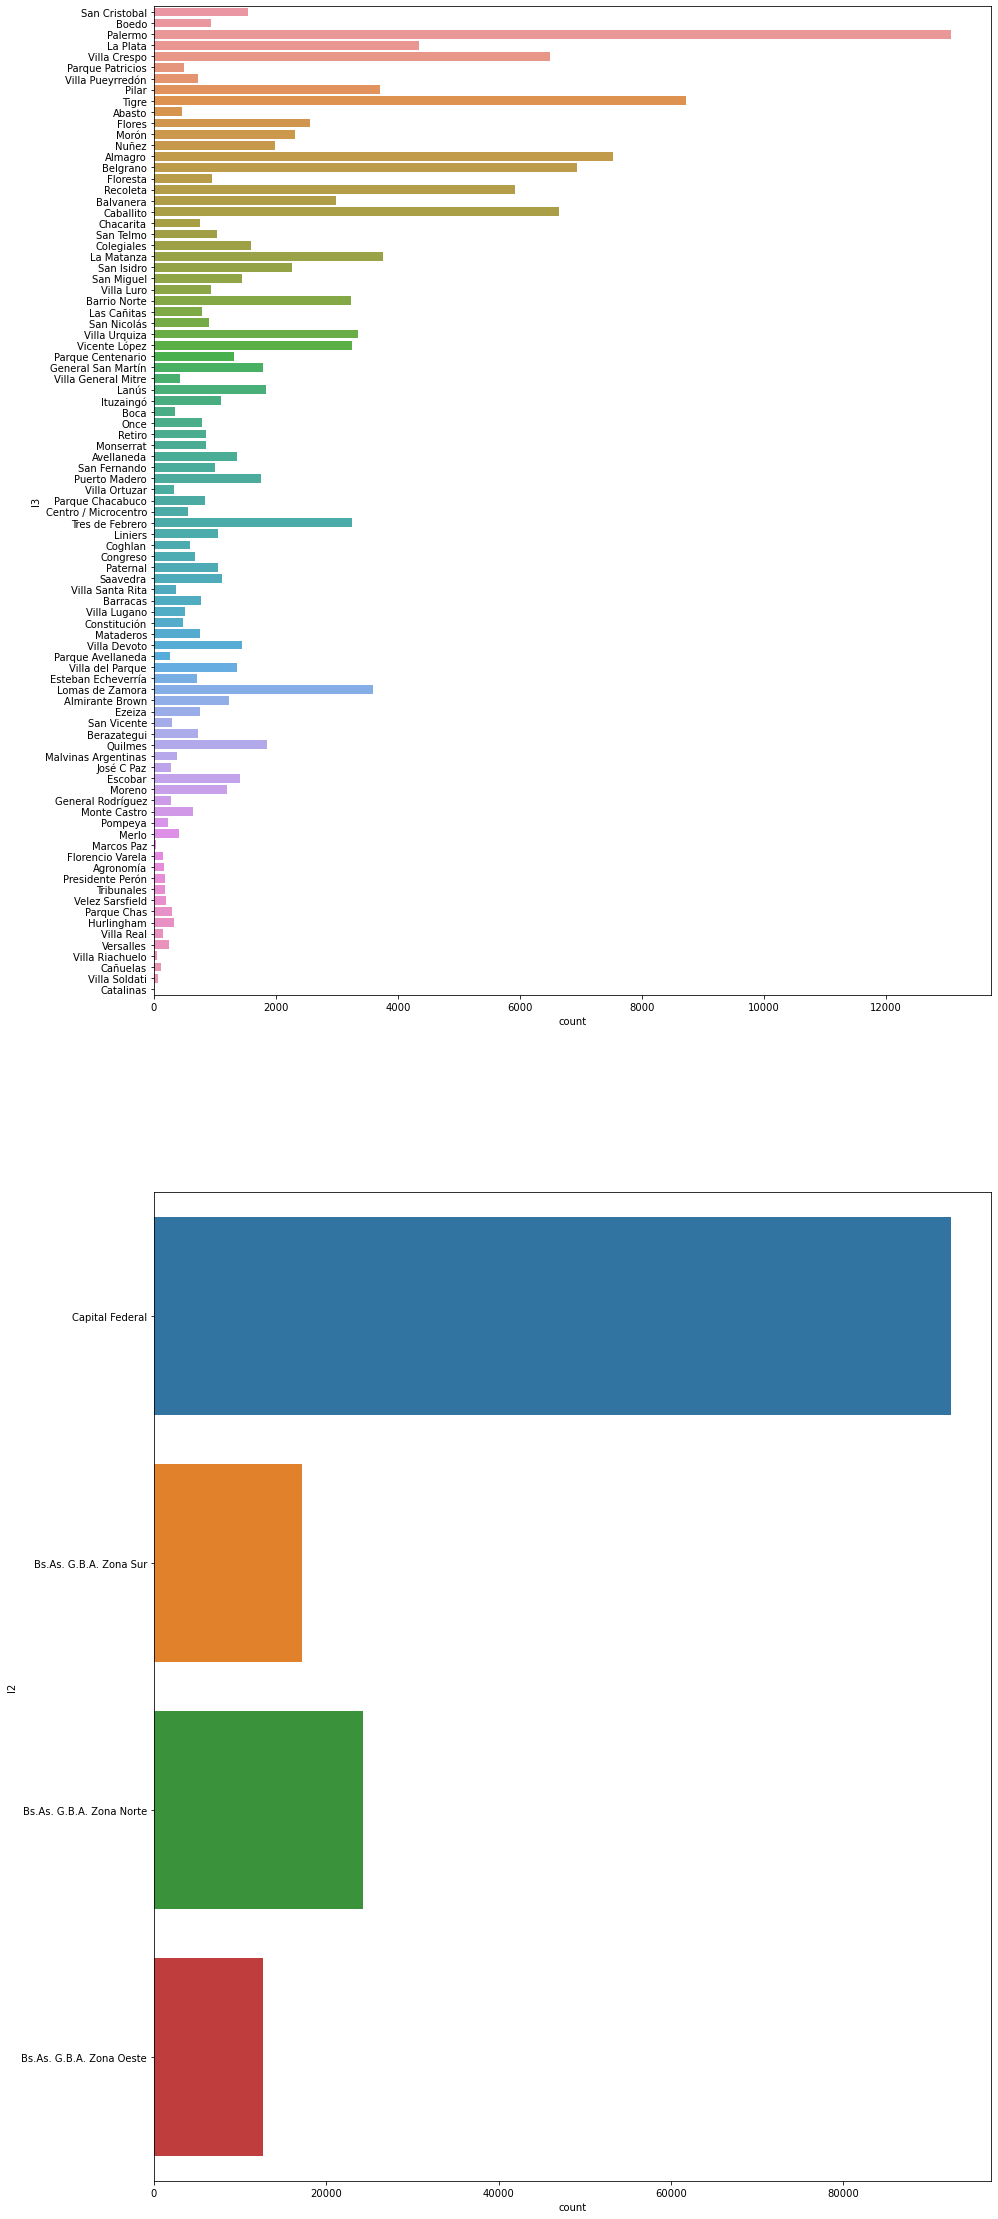

In [11]:
#Realizamos un subplot de dos graficos, en el primero se observa la distribucion de acuerdo al barrio, en el segundo la distribucion de acuerdo a la zona.
fig, axes = plt.subplots(2,1, figsize=(15, 40))
sns.countplot(data = properti, y = "l3", ax=axes[0])
sns.countplot(data = properti, y = "l2", ax=axes[1])

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Determinamos cuales son los 3 tipos de propiedad con mas publicaciones
cantidad_tipo.head(3)

Departamento    107326
Casa             21521
PH               14298
Name: property_type, dtype: int64

In [13]:
#Determinamos cual es la region con mas publicaciones
region_l2.head(1)

Capital Federal    92539
Name: l2, dtype: int64

In [14]:
#Creamos un nuevo df en base a la region con mas publicaciones y a los 3 tipos de propiedad con mas publicaciones
properti_filter = properti.loc[(properti['l2'] == 'Capital Federal') & ((properti['property_type'] == 'Departamento') | (properti['property_type'] == 'PH') | (properti['property_type'] == 'Casa'))]
properti_filter.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [15]:
#Creamos un nuevo DF para poder trabajar de acuerdo a los valores solicitados.
properti_value = properti_filter[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']].copy()
properti_value.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [16]:
#Por tipo de propiedad, podemos ver la sumatoria de todos las observaciones por columna
properti_value.groupby("property_type").sum()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,
Casa,13229.0,9373.0,6030.0,624082.0,494072.0,1.070223e+09
Departamento,222435.0,145172.0,118207.0,6960660.0,6049998.0,2.052981e+10
PH,35523.0,24791.0,15106.0,1714592.0,1266909.0,2.140352e+09


In [17]:
#Calculamos la media por cada columna para cada tipo de propiedad
properti_value.groupby("property_type").mean()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,
Casa,4.914190,3.481798,2.368421,276.877551,220.174688,397556.942422
Departamento,2.814600,1.836946,1.533324,98.604091,86.041357,259775.596060
PH,3.638161,2.539021,1.561182,176.362065,130.730472,219208.547214


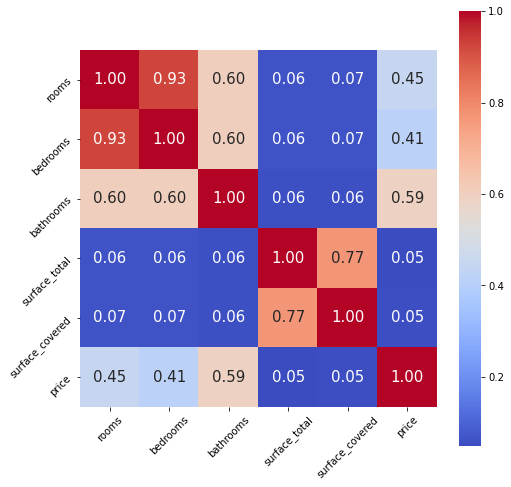

In [18]:
#Establecemos una matriz de correlaciones para determinar como se relacionan las variables en base al precio de las publicaciones trabajando con un DF sin filtrar valores atipicos segun columnas de trabajo
corr = properti_value.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_value.drop(columns = 'property_type').columns, 
           yticklabels= properti_value.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

##### En el grafico anterior se evidencia en primera medida el hecho de que el precio presenta mayor relacion con la cantidad de habitacion y su distribucion (Baños y cuartos) que con los valores de la superficie (tanto total como cubierta).

In [19]:
#Se determina el valor minimo de cada columna
properti_value[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].min(axis=0)

rooms                 1.0
bedrooms              0.0
bathrooms             1.0
surface_total        10.0
surface_covered       1.0
price              6000.0
dtype: float64

In [20]:
#Se determina el valor maximo de cada columna
properti_value[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].max(axis=0)

rooms                    26.0
bedrooms                 15.0
bathrooms                14.0
surface_total        126062.0
surface_covered      126062.0
price              32434232.0
dtype: float64

In [21]:
#Se determina el promedio de cada columna
properti_value[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].mean(axis=0)

rooms                   2.964278
bedrooms                1.960278
bathrooms               1.560147
surface_total         112.626369
surface_covered        94.966310
price              259500.258239
dtype: float64

<AxesSubplot:xlabel='price'>

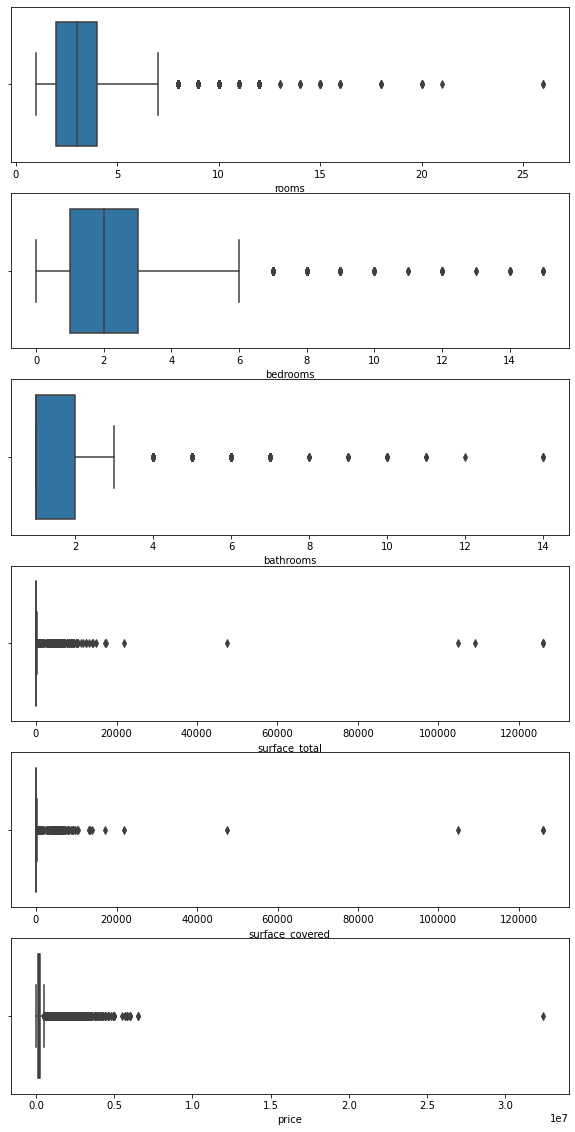

In [22]:
#Por medio de subplots, se confecciona un boxplot para cada columna. Se observan valores atipicos muy marcados.
fig, axes = plt.subplots(6,1, figsize=(10, 20))
sns.boxplot(data = properti_value, x = "rooms", ax=axes[0])
sns.boxplot(data = properti_value, x = "bedrooms", ax=axes[1])
sns.boxplot(data = properti_value, x = 'bathrooms', ax=axes[2])
sns.boxplot(data = properti_value, x = 'surface_total', ax=axes[3])
sns.boxplot(data = properti_value, x = 'surface_covered', ax=axes[4])
sns.boxplot(data = properti_value, x = 'price', ax=axes[5])

##### En los boxplots mostrados anteriormente, se observan valores atipicos muy marcados, principalmente para las observaciones de las columnas "surface total", "surface covered" y "price" al punto de no poder determinar de manera clara y con cierta precision, cuales son los valores del IQR, el minimo y maximo respectivamente.

In [23]:
#De acuerdo a los valores observados anteriormente, se procede a aplicar un filtro nuevo a criterio personal.
properti_filter_2 = properti_value.loc[(properti_value['rooms'] <= 10) & (properti_value['surface_total'] >= properti_value['surface_covered']) & (properti_value['surface_total'] <= 350) & (properti_value['surface_total'] >= 40) & (properti_value['surface_covered'] >= 30) & (properti_value['price'] <= 450000)]
properti_filter_2.shape

(63182, 7)

<AxesSubplot:xlabel='price'>

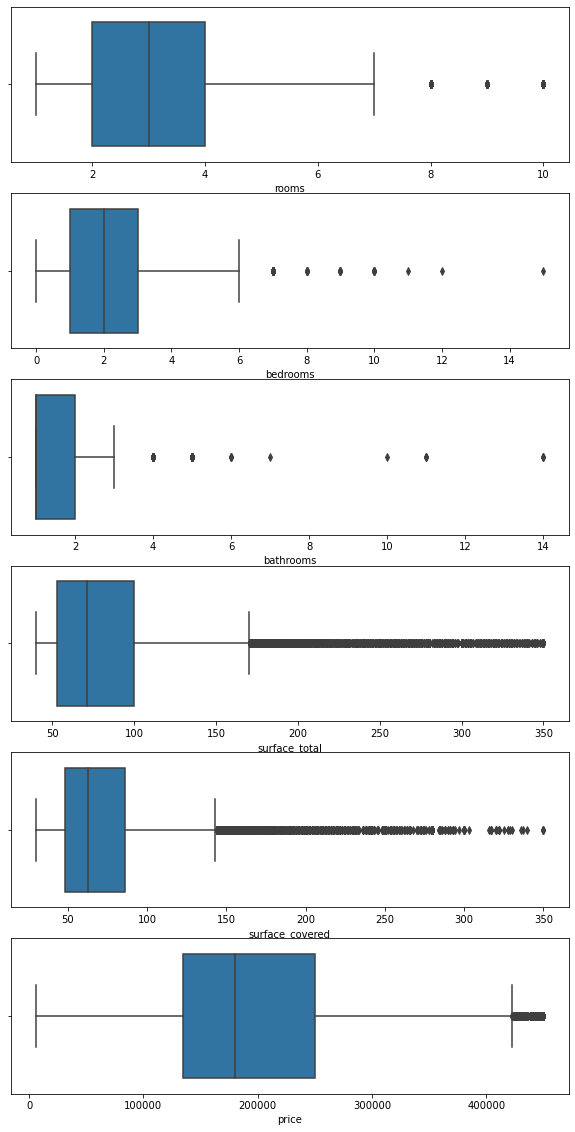

In [24]:
fig, axes = plt.subplots(6,1, figsize=(10, 20))
sns.boxplot(data = properti_filter_2, x = "rooms", ax=axes[0])
sns.boxplot(data = properti_filter_2, x = "bedrooms", ax=axes[1])
sns.boxplot(data = properti_filter_2, x = 'bathrooms', ax=axes[2])
sns.boxplot(data = properti_filter_2, x = 'surface_total', ax=axes[3])
sns.boxplot(data = properti_filter_2, x = 'surface_covered', ax=axes[4])
sns.boxplot(data = properti_filter_2, x = 'price', ax=axes[5])

##### Al aplicar filtros y volver a realizar los boxplots, si bien mejora la distribucion al ser posible estimar los IQR, minimos y maximos de cada grafico, todavia se observan outliers. En este caso corresponderia un mayor analisis para determinar que outliers serian permisibles para trabajar y cual "columna" se deberia ajustar con el proposito de evitarlos.

In [25]:
properti_filter_2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].min(axis=0)

rooms                 1.0
bedrooms              0.0
bathrooms             1.0
surface_total        40.0
surface_covered      30.0
price              6000.0
dtype: float64

In [26]:
properti_filter_2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].max(axis=0)

rooms                  10.0
bedrooms               15.0
bathrooms              14.0
surface_total         350.0
surface_covered       350.0
price              450000.0
dtype: float64

In [27]:
properti_filter_2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].mean(axis=0)

rooms                   2.983381
bedrooms                1.976655
bathrooms               1.439345
surface_total          84.087699
surface_covered        72.605679
price              200969.851065
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

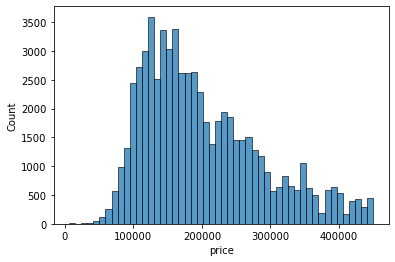

In [28]:
#En base al filtro aplicado sobre la columna precio, se realiza un histograma para ver su distribucion.
sns.histplot(data = properti_filter_2, x='price', bins=50)

##### Del histograma anterior surge que la mayor cantidad de observaciones en relacion al precio se ubican entre los 100.000 y 200.000, para luego presentar una leve reduccion en la cantidad de observaciones que se mantiene hasta los 270.000 aproximado para luego descender de manera marcada. En concordancia con lo expresado anteriormente, corresponderia un analisis mas exhaustivo con el proposito de determinar la relevancia en la construccion de modelos de la cola observada hacia valores altos (mayor a  300.000) en el grafico anterior.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

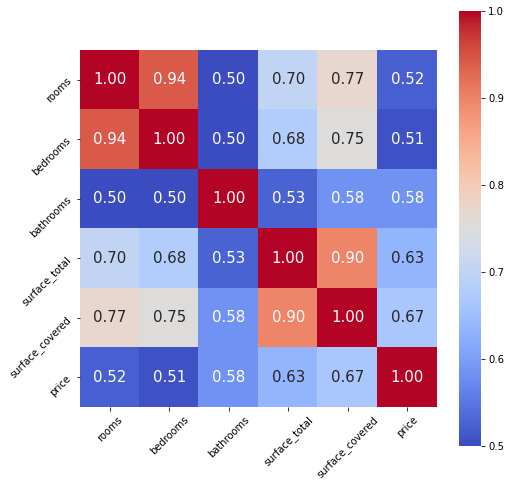

In [29]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
corr = properti_filter_2.drop(columns = "property_type").corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_filter_2.drop(columns = "property_type").columns, 
           yticklabels= properti_filter_2.drop(columns = "property_type").columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

De acuerdo a los filtros aplicados y trabajando sobre el DF de "properti_filter_2", las mejores variables para predecir el precio son aquellas relacionadas con la supercicie, tanto total como cubierta, pero no muestran una diferencia sustancial respecto a la cantidad de habitaciones, piezas y baños.

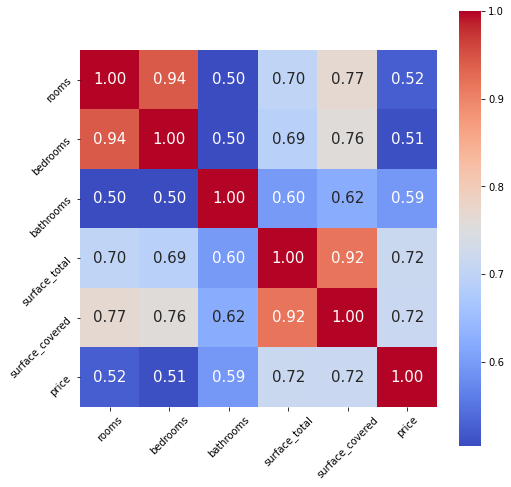

In [30]:
#Se establece matriz de correlaciones en DF con valores filtrados para determinar correlaciones solo por tipo: "Departamento"
properti_2_departamento = properti_filter_2.loc[(properti['property_type'] == 'Departamento')]
corr = properti_2_departamento.drop(columns = "property_type").corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_2_departamento.drop(columns = 'property_type').columns, 
           yticklabels= properti_2_departamento.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


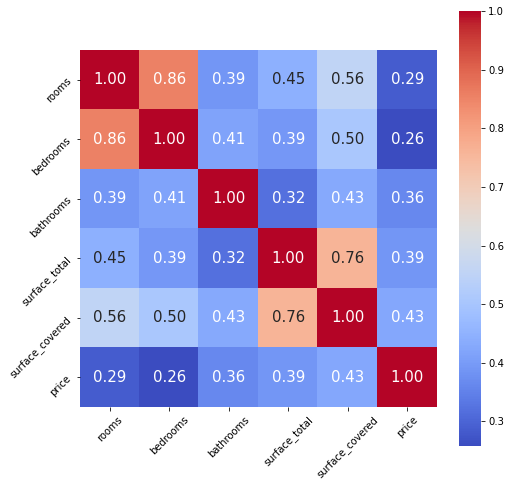

In [31]:
#Se establece matriz de correlaciones en DF con valores filtrados para determinar correlaciones solo por tipo: "Casa"
properti_2_casa = properti_filter_2.loc[(properti['property_type'] == 'Casa')]
corr = properti_2_casa.drop(columns = "property_type").corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_2_casa.drop(columns = "property_type").columns, 
           yticklabels= properti_2_casa.drop(columns = "property_type").columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

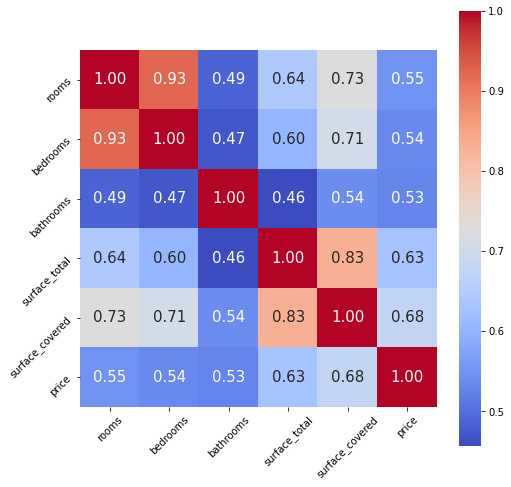

In [32]:
#Se establece matriz de correlaciones en DF con valores filtrados para determinar correlaciones solo por tipo: "PH"
properti_2_ph = properti_filter_2.loc[(properti['property_type'] == 'PH')]
corr = properti_2_ph.drop(columns = "property_type").corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_2_ph.drop(columns = "property_type").columns, 
           yticklabels= properti_2_ph.drop(columns = "property_type").columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

##### Se establece que las variables que mejor permitirian predecir el precio segun el tipo de vivienda coincide en los tres casos, y son principalmente la superficie total y la superficie cubierta. Ambas observaciones coinciden para el caso en que el tipo de propiedad es "Departamento" o "PH" (entre 10 a 20 puntos) al comparar los valores obtenidos entre superficie (total y cubierta) con habitaciones (cantidad, baños, cuartos), pero la diferencia no es tan marcada para el caso de las Casas

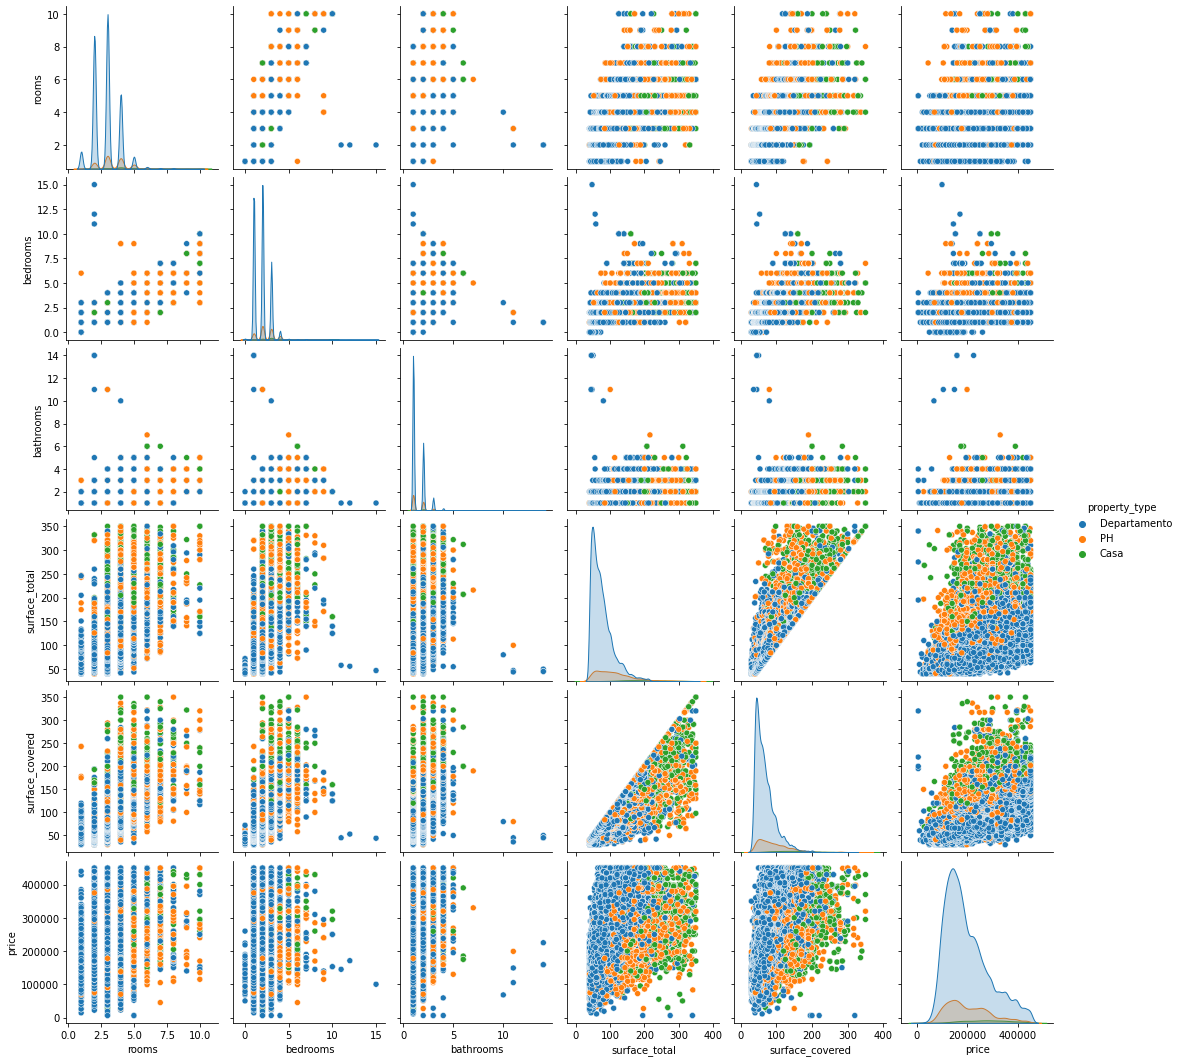

In [33]:
#Se realiza el pairplot correspondiente en base a los ultimos filtros aplicados y discriminando por tipo de propiedad
sns.pairplot(data = properti_filter_2, hue="property_type")

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


#### Pregunta
Determinar cual es la distribucion de los tipos de propiedad Casa, Departamento y PH por barrio

In [34]:
# Comenzamos importando y cargando el DataFrame
properti_ch = pd.read_csv("../DS_Proyecto_01_Datos_Properati.csv")
properti_ch.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [35]:
#Aplicamos un filtro de acuerdo a las columnas que son relevantes para resolver la pregunta y por medio de la funcion "head()", verificamos que se haya filtrado correctamente
properti_filter = properti_ch[['l3', 'property_type']]
properti_filter.head()

,l3,property_type
0,San Cristobal,Departamento
1,Boedo,PH
2,Palermo,PH
3,Palermo,PH
4,La Plata,PH


In [36]:
#Procedemos a filtrar de la columna property_type los valores relevantes para determinar su distribucion
properti_final = properti_filter.loc[((properti['property_type'] == 'Departamento') | (properti['property_type'] == 'PH') | (properti['property_type'] == 'Casa'))]
properti_final.head()

,l3,property_type
0,San Cristobal,Departamento
1,Boedo,PH
2,Palermo,PH
3,Palermo,PH
4,La Plata,PH


In [37]:
#Realizamos un agrupamiento en base al barrio y subdivido por tipo de propiedad, aplicando una funcion adicional de contar no zeros
properti_final.groupby(by = ['l3', 'property_type']).agg(np.count_nonzero)

l3                property_type
Abasto            Casa                8
                  Departamento      836
                  PH                 80
Agronomía         Casa               38
                  Departamento      180
                                   ... 
Villa Urquiza     Departamento     5456
                  PH                990
Villa del Parque  Casa              148
                  Departamento     1922
                  PH                622
Length: 259, dtype: int64

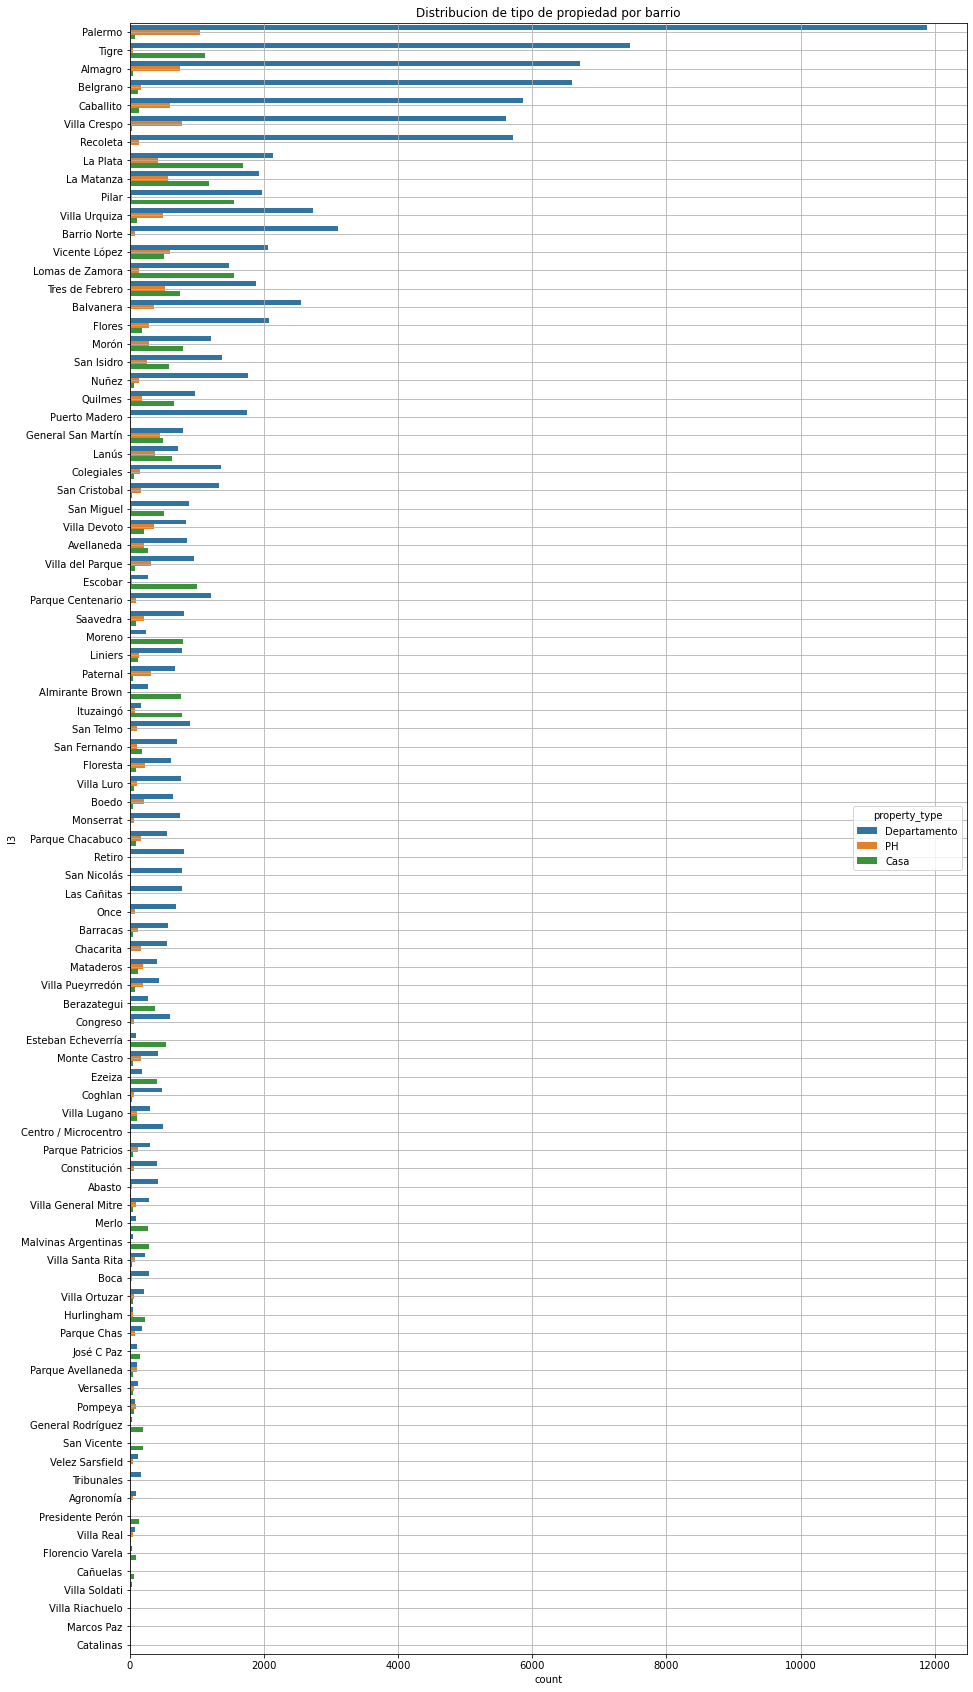

In [38]:
#Procedemos a realizar un grafico para observar de manera clara como se distribuye cada tipo de propiedad por barrio en base a los valores obtenidos anteriormente
dimension = (15, 30)
fig, ax = plt.subplots(figsize=dimension)

plt.title('Distribucion de tipo de propiedad por barrio')
sns.countplot(data = properti_final, y = "l3", hue='property_type', order = properti_final['l3'].value_counts().index)
plt.grid() 
plt.show()


### Conclusion
Se observa que en terminos generales la mayor cantidad de publicaciones por barrio se corresponde con departamentos, solo en contadas excepciones hay mayor publicacion de casas que de otro tipo. 
El analisis anterior puede complementarse con un estudio de las caracteristicas de los barrios que no presentan mayor cantidad de departamentos para determinar a que se debe la diferencia, pero se requiere mayor informacion cualitativa para poder realizarlo

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [39]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Se aplican filtros solicitados para tener un dataset apropiado
properti_ml = properti.loc[(properti['l2'] == 'Capital Federal') & ((properti['property_type'] == 'Departamento') | (properti['property_type'] == 'PH') | (properti['property_type'] == 'Casa'))]
properti_ml = properti_ml.loc[(properti_ml['surface_total'] <= 1000) & (properti_ml['surface_total'] >= 15) & (properti_ml['price'] <= 4000000)]
properti_ml = properti_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

properti_ml = properti_ml.dropna()
properti_ml.shape

(81019, 6)

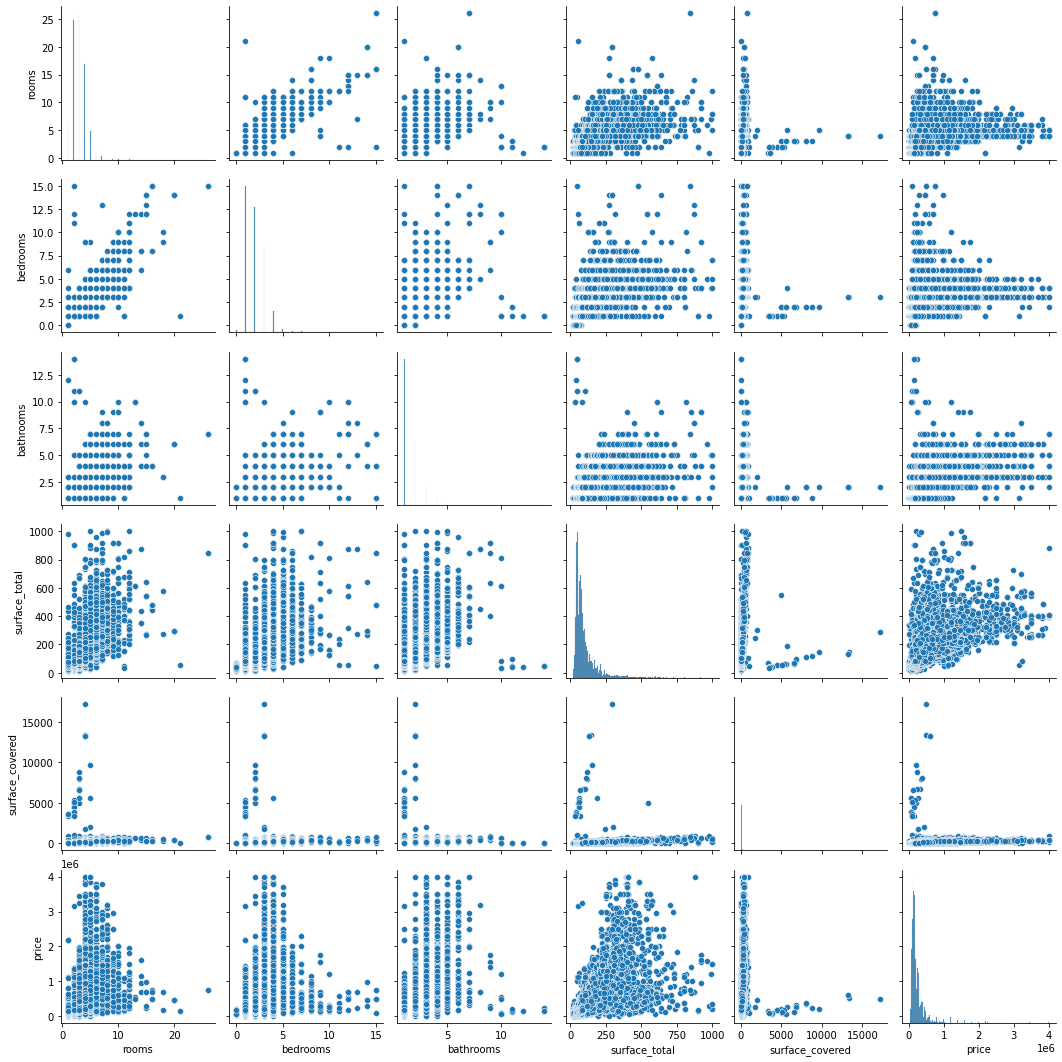

In [40]:
#Se realiza un pairplot para estimar que tipo de distribucion existe entre las columnas y la variable precio
sns.pairplot(data=properti_ml)

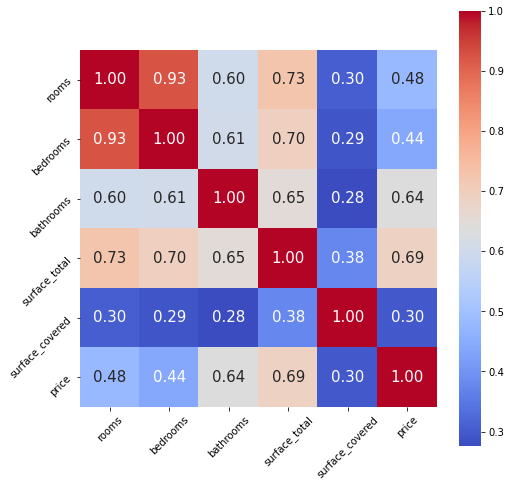

In [41]:
#Por medio de una matriz de correlacion se busca determinar cuales serian las variables mas apropiadas para predecir el precio. 
#Observando que despues de aplicar los filtros solicitados, la superficie total y la cantidad de baños mejor se relacionan para predecir el precio
corr = properti_ml.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properti_ml.columns, 
           yticklabels= properti_ml.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#### Para determinar la precicion de los modelos a entrenar y, atento a que los mismos consisten en regresion y no clasificacion, se procedera a implementar el error cuadratico medio, atento a que el mismo mide la distancia entre el estimador y lo que se esta estimando, en este caso el mejor resultado posible se dara para valores bajos, dado que significa que el modelo estaria prediciendo con mejor precision los valores correspondientes.

In [42]:
#Se establece la variable values para agregar nuevas variables predictoras, y el valor de Y tomando el precio real.
values = ['surface_total']
X = properti_ml[values]
y = properti_ml['price']

In [43]:
#Se importan las librerias y funcionalidades correspondientes y se crean las variables de entrenamiento y prueba para los modelos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
#Se establece el modelo benchmark (regresion lineal), y se procede a determinar el valor del error cuadratico medio para dicho modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
error_reg_linear = sqrt(mean_squared_error(y_test, y_pred_linear))
print(error_reg_linear)

215583.7905576335


In [45]:
# Se establece y entrena el modelo de arboles de decisiones, iniciando el modelo con un max_depth de 3. Al igual que para el modelo de regresion lineal, se establece tambien el valor del
# error cuadratico para dichos hiperparametros
reg_tree = DecisionTreeRegressor (max_depth = 3, random_state = 42)
reg_tree.fit(X_test, y_test)
y_pred = reg_tree.predict(X_test)
error_reg_tree = sqrt(mean_squared_error(y_test, y_pred))
print(error_reg_tree)

210785.7888467009


In [46]:
# Finalmente, se establece y entrena el modelo de KNN. Comenzando con un valor de 3 para los neighbors, se procede a determinar el error cuadratico.
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
reg_pred = knn_regressor.predict(X_test)
error_reg = sqrt(mean_squared_error(y_test, reg_pred))
print(error_reg)

218709.37675588424


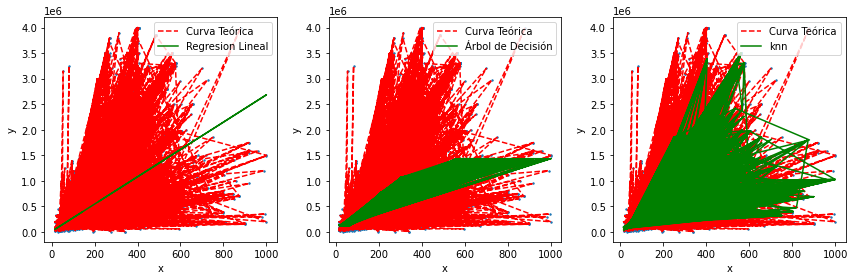

In [47]:
#Se grafica la curva teorica en base a X y Y reales, y la curva de cada modelo.
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,reg_tree.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
#Se realiza una funcion que permita determinar la precision del modelo KNN a medida que aumenta la cantidad de vecinos a considerar. EL rango va de 1 a 20 vecinos.
rmse_val = []
for k in range(20):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k)
    
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X)
    error = sqrt(mean_squared_error(y, knn_pred))
    rmse_val.append(error)
    print('RMSE value por n_neighbors =', k, 'is: ', error)

RMSE value por n_neighbors = 1 is:  251562.42353185543
RMSE value por n_neighbors = 2 is:  219186.41966274887
RMSE value por n_neighbors = 3 is:  209638.8189952131
RMSE value por n_neighbors = 4 is:  203198.5438230718
RMSE value por n_neighbors = 5 is:  198360.43135866383
RMSE value por n_neighbors = 6 is:  196406.49414001504
RMSE value por n_neighbors = 7 is:  195281.46847904488
RMSE value por n_neighbors = 8 is:  195130.6645349732
RMSE value por n_neighbors = 9 is:  193981.66500458398
RMSE value por n_neighbors = 10 is:  194335.99331216776
RMSE value por n_neighbors = 11 is:  194783.1436533385
RMSE value por n_neighbors = 12 is:  194892.63243731108
RMSE value por n_neighbors = 13 is:  195331.49822878392
RMSE value por n_neighbors = 14 is:  195032.5346405848
RMSE value por n_neighbors = 15 is:  194559.4127329019
RMSE value por n_neighbors = 16 is:  194668.589300416
RMSE value por n_neighbors = 17 is:  194336.16497892284
RMSE value por n_neighbors = 18 is:  194752.62587691174
RMSE valu

Text(0.5, 1.0, 'Error del modelo segun valor de n_neighboors')

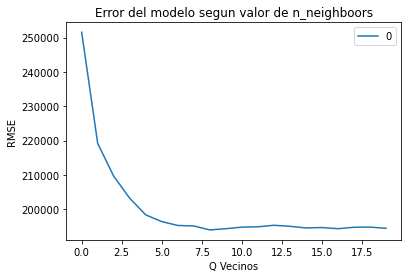

In [49]:
#Se grafican los valores obtenidos anteriormente
curve = pd.DataFrame(rmse_val)
curve.plot()
plt.xlabel('Q Vecinos')
plt.ylabel('RMSE')
plt.title('Error del modelo segun valor de n_neighboors')

In [50]:
#De manera similar, se establece la funcion que permita determinar la precision del arbol de decision a medida que aumenta el valor de max_depth, el rango tambien va de 1 a 20
val_tree = []
for md in range (20):
    md = md+1
    reg_tree = DecisionTreeRegressor (max_depth = md, random_state = 42)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    error_reg_1 = sqrt(mean_squared_error(y_test, y_pred))
    val_tree.append(error_reg_1)
    print("RMSE value para max_depth = ", md, "es: ", error_reg_1)
    

RMSE value para max_depth =  1 es:  239347.1316198491
RMSE value para max_depth =  2 es:  219777.60224836165
RMSE value para max_depth =  3 es:  212621.18885108572
RMSE value para max_depth =  4 es:  210973.55857612524
RMSE value para max_depth =  5 es:  208943.32054843986
RMSE value para max_depth =  6 es:  205494.11461421923
RMSE value para max_depth =  7 es:  205293.08362094784
RMSE value para max_depth =  8 es:  202759.3351995598
RMSE value para max_depth =  9 es:  201724.80256256467
RMSE value para max_depth =  10 es:  200638.49596744883
RMSE value para max_depth =  11 es:  200031.50518366578
RMSE value para max_depth =  12 es:  200572.520451737
RMSE value para max_depth =  13 es:  200279.1660961608
RMSE value para max_depth =  14 es:  200969.26099557185
RMSE value para max_depth =  15 es:  200682.82785601143
RMSE value para max_depth =  16 es:  200537.95470486
RMSE value para max_depth =  17 es:  200407.1059382156
RMSE value para max_depth =  18 es:  200502.62611812854
RMSE value

Text(0.5, 1.0, 'Eficiencia del modelo segun valor de Max Depth')

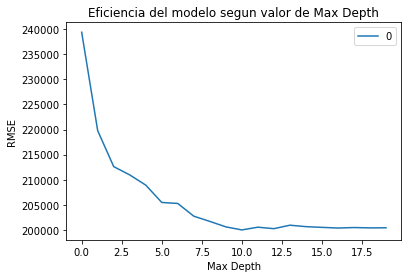

In [51]:
#Se grafica la curva correspondiente segun los valores obtenidos
tree_curve = pd.DataFrame(val_tree)
tree_curve.plot()
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Eficiencia del modelo segun valor de Max Depth')

# Conclusiones
### Respecto a los modelos
De los 3 modelos realizados, considero que el mejor para esta situacion y estimando el valor de la propiedad en base a la superficie total es el modelo de KNN para una cantidad de vecinos de 9. Para este valor, el error estimado es de 193 mil, que en relacion a los 4 millones de valor maximo de la propiedad representa el 5%.

Respecto a la comparacion con el valor obtenido en el modelo benchmark (regresion lineal), solo en aquellos casos en los cuales, tanto el max_depth como el n_neighbors adoptan un valor de 1 o 2, el modelo de regresion lineal seria mejor. Para valores mayores a 2, el modelo de KNN es mejor que el de regresion y que el arbol de decision.

Lo establecido anteriormente es valido para aquellos casos en los cuales la variable predictora sea la superficie total, la cual al trabajarse con los filtros aplicados, presenta una correlacion de 0.69 con la variable precio.

### Respecto a las variables
De los analisis realizados (correlacion, pairplot), considero que hay variables que fueron descartadas y que son representativas o que poseen mucha "influencia" al momento de determinar el precio, principalmente aquellas relacionadas con la ubicacion del inmueble en cuestion, como ser el barrio (l3) y la zona (l2) principalmente.

Adicional a las cuestiones de ubicacion, es importante complementarlo con el tipo de propiedad que se esta comprando/alquilando, valores que no fueron tenidos en cuenta y que pueden estar sesgando los valores obtenidos en los modelos entrenados, dado que los precios promedio presentan mucha variacion entre los tres tipos de propiedad considerados (casa, ph y departamento), siendo la diferencia entre la casa y el ph casi el doble y entre la casa y el departamento de un 50%.